# 📊**Superstore Sales Analysis** - **Data Analytics Project**
# 📌 **Project Objective**:

*This project performs an end-to-end analysis of Superstore sales data to uncover trends, customer behavior, and product performance. The goal is to simulate a real-world Data Analyst workflow, including data cleaning, visualization, and business insights using Python.*

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import files
uploaded = files.upload()


In [5]:
df = pd.read_csv("big_superstore_sales.csv")
df.head()


,Invoice ID,Date,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,Payment,City,Discount
0,531-87-6366,08/13/2019,Member,Female,Sports and travel,30.13,9,13.56,284.73,Credit card,Mandalay,0
1,368-31-9436,09/15/2019,Normal,Male,Sports and travel,99.42,2,9.94,208.78,Credit card,Mandalay,15
2,462-62-2289,04/04/2019,Member,Male,Food and beverages,86.23,4,17.25,362.17,Ewallet,Mandalay,15
3,440-15-9278,04/19/2019,Normal,Female,Fashion accessories,67.13,10,33.56,704.86,Cash,Naypyitaw,15
4,194-43-1231,09/28/2019,Normal,Female,Food and beverages,48.68,5,12.17,255.57,Cash,Naypyitaw,5


In [6]:
# Check for missing values
df.isnull().sum()

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Create additional columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day_name()


In [7]:
monthly_sales = df.groupby(['Year', 'Month'])['Total'].sum().reset_index()
fig = px.line(monthly_sales, x='Month', y='Total', color='Year', title='Monthly Sales Trend')
fig.show()


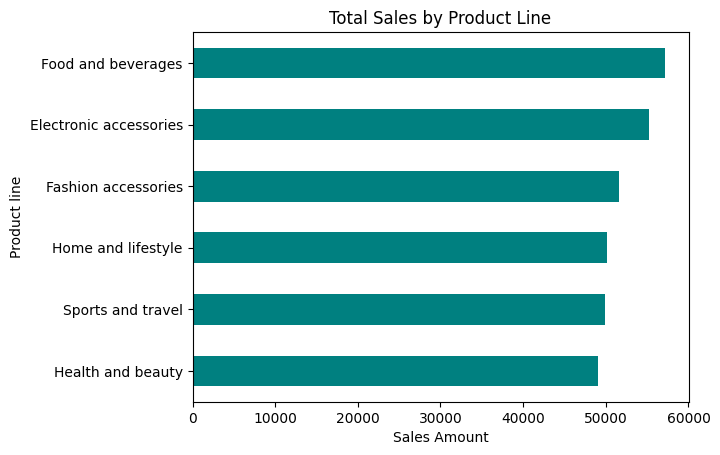

In [8]:
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=True)
product_sales.plot(kind='barh', color='teal')
plt.title("Total Sales by Product Line")
plt.xlabel("Sales Amount")
plt.show()


In [9]:
city_sales = df.groupby('City')['Total'].sum().sort_values(ascending=False)
px.bar(city_sales, title="Sales by City", labels={"value":"Total Sales"})


In [10]:
cust_sales = df.groupby('Customer type')['Total'].sum().reset_index()
px.pie(cust_sales, values='Total', names='Customer type', title='Sales by Customer Type')


/tmp/ipython-input-11-1699497184.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




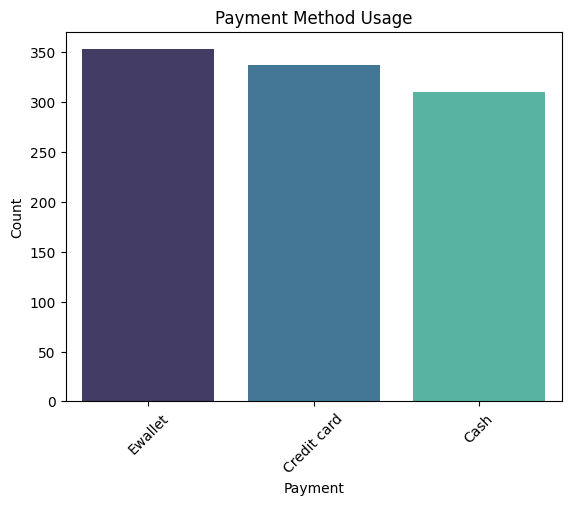

In [11]:
payment_counts = df['Payment'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='mako')
plt.title("Payment Method Usage")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


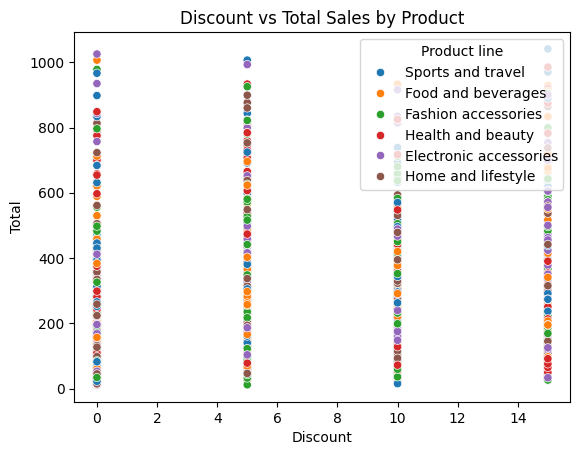

In [12]:
sns.scatterplot(x='Discount', y='Total', data=df, hue='Product line')
plt.title("Discount vs Total Sales by Product")
plt.show()


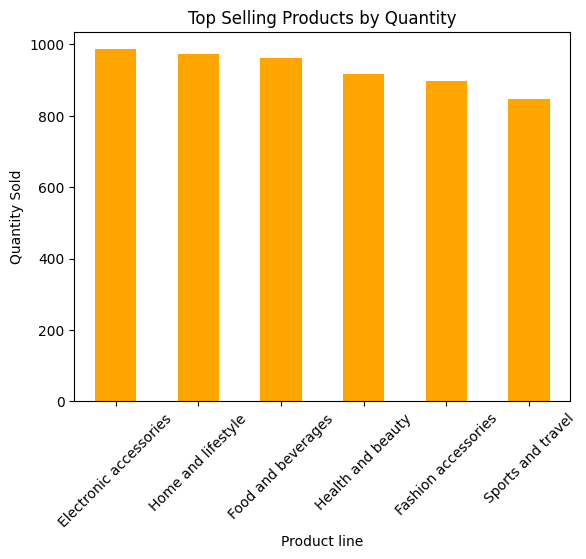

In [13]:
top_products = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
top_products.plot(kind='bar', color='orange', title="Top Selling Products by Quantity")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


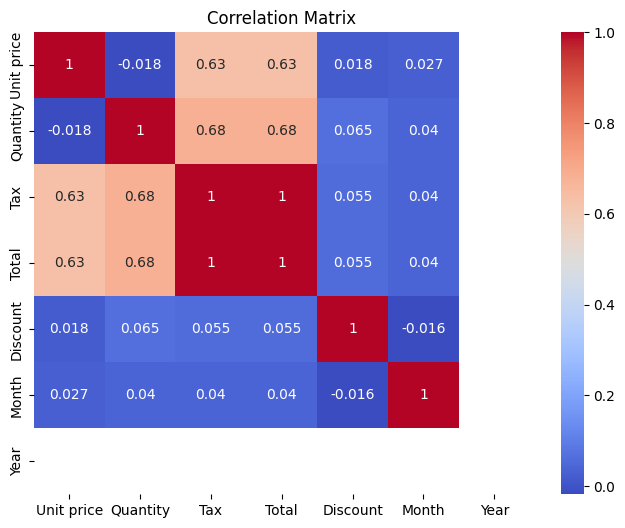

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [15]:
print("🔹 Top Product Line:", product_sales.idxmax())
print("🔹 City with Highest Sales:", city_sales.idxmax())
print("🔹 Most Used Payment Method:", payment_counts.idxmax())


🔹 Top Product Line: Food and beverages
🔹 City with Highest Sales: Mandalay
🔹 Most Used Payment Method: Ewallet


In [16]:
# Save processed data
df.to_csv("cleaned_big_superstore_data.csv", index=False)

# Download the file
files.download("cleaned_big_superstore_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>